In [1]:
# standard external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The dataset is from: https://open.canada.ca/data/en/dataset/ec8d3e9b-c21a-01b2-9787-abb4b55940ea

It contains crimes by offence type. The target variable is "Homicide".

In [2]:
# load dataset

file_location ='database_var.csv'

df = pd.read_csv(file_location)

In [3]:
print(df.describe())

df.info()

              Year  Total.Violent.Criminal.Code.Violations     Homicide  \
count  2100.000000                             2100.000000  2100.000000   
mean   2013.000000                            15285.523810    29.364762   
std       4.321523                            49855.307211    89.091745   
min    2006.000000                                0.000000     0.000000   
25%    2009.000000                              100.000000     0.000000   
50%    2013.000000                              484.500000     0.000000   
75%    2017.000000                             5490.750000    10.000000   
max    2020.000000                           480004.000000   743.000000   

       Murder..First.degree  Murder..Second.degree  Manslaughter  \
count           2100.000000            2100.000000   2100.000000   
mean              10.998571              14.642857      3.702381   
std               35.508925              43.744440     11.310360   
min                0.000000               0.000000  

In [4]:
# keep needed columns
data = df[['Year', 'Geography', 'Data.Type', 'Homicide','Attempted.Murder', 'Sexual.Assault..Level.1', 'Assault..Level.1', 'Criminal.Harassment', 'Uttering.Threats']]
data

,Year,Geography,Data.Type,Homicide,Attempted.Murder,Sexual.Assault..Level.1,Assault..Level.1,Criminal.Harassment,Uttering.Threats
0,2006,"Labrador West, R.N.C.",actual_incidents,0,0,7,58,0,31
1,2006,"Corner Brook, R.N.C.",actual_incidents,1,0,10,108,5,55
2,2006,Northeast Avalon R.N.C,actual_incidents,1,1,107,912,65,596
3,2006,"Labrador District, RCMP",actual_incidents,1,1,73,735,12,145
4,2006,"Northern Peninsula District, RCMP",actual_incidents,0,0,9,43,2,20
...,...,...,...,...,...,...,...,...,...
2095,2020,"Burin Peninsula District, RCMP",actual_incidents,0,1,5,109,1,76
2096,2020,"Burin Peninsula District, RCMP",total_cleared,0,1,2,65,0,38
2097,2020,"Burin Peninsula District, RCMP",tot_persons_charged,0,1,2,34,0,13
2098,2020,"Burin Peninsula District, RCMP",tot_adults_charged,0,1,2,27,0,12


In [5]:
#total count of NaNs

for idx,col in enumerate(data.isnull().sum()):
    print(data.columns[idx],col)

Year 0
Geography 0
Data.Type 0
Homicide 0
Attempted.Murder 0
Sexual.Assault..Level.1 0
Assault..Level.1 0
Criminal.Harassment 0
Uttering.Threats 0


In [6]:
#create subset for provinces in Canada and display acta incidents data only

provinces = ['Newfoundland and Labrador', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
            'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Yukon']  

subset_provinces = data[data['Geography'].isin(provinces)  & (data['Data.Type'].isin(['actual_incidents']))]
subset_provinces

,Year,Geography,Data.Type,Homicide,Attempted.Murder,Sexual.Assault..Level.1,Assault..Level.1,Criminal.Harassment,Uttering.Threats
605,2006,Newfoundland and Labrador,actual_incidents,7,5,336,3097,155,1585
606,2007,Newfoundland and Labrador,actual_incidents,3,1,401,3455,172,1663
607,2008,Newfoundland and Labrador,actual_incidents,5,2,416,3415,197,1768
608,2009,Newfoundland and Labrador,actual_incidents,1,0,353,3520,229,1825
609,2010,Newfoundland and Labrador,actual_incidents,4,2,367,3406,223,1919
...,...,...,...,...,...,...,...,...,...
2000,2020,Saskatchewan,actual_incidents,60,46,1296,11108,835,4078
2005,2020,Alberta,actual_incidents,139,56,3420,23034,2350,9559
2010,2020,British Columbia,actual_incidents,98,102,3771,27352,2107,16362
2015,2020,Yukon,actual_incidents,0,3,116,1028,72,379


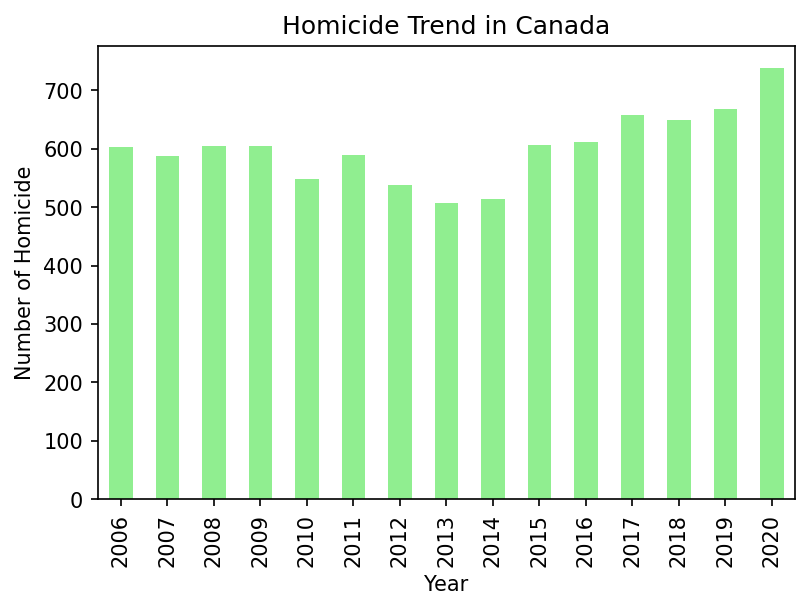

In [28]:
# plot homicide trend in bar chart
plt.figure(figsize= (6,4), dpi = 150)
subset_provinces.groupby('Year')['Homicide'].sum().plot(kind='bar', color= 'lightgreen')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Homicide')
plt.title('Homicide Trend in Canada')

# Save the plot to an image file
plt.savefig('ISP_Figures/Homicide_Bar_plot.png')

In [8]:
#set the features and targets

features = ['Attempted.Murder', 'Sexual.Assault..Level.1', 'Assault..Level.1', 'Criminal.Harassment', 'Uttering.Threats', 'Geography']
X1 = subset_provinces[features]

y = subset_provinces.Homicide
print(X1)

      Attempted.Murder  Sexual.Assault..Level.1  Assault..Level.1  \
605                  5                      336              3097   
606                  1                      401              3455   
607                  2                      416              3415   
608                  0                      353              3520   
609                  2                      367              3406   
...                ...                      ...               ...   
2000                46                     1296             11108   
2005                56                     3420             23034   
2010               102                     3771             27352   
2015                 3                      116              1028   
2020                 1                      244              2800   

      Criminal.Harassment  Uttering.Threats                  Geography  
605                   155              1585  Newfoundland and Labrador  
606                   172

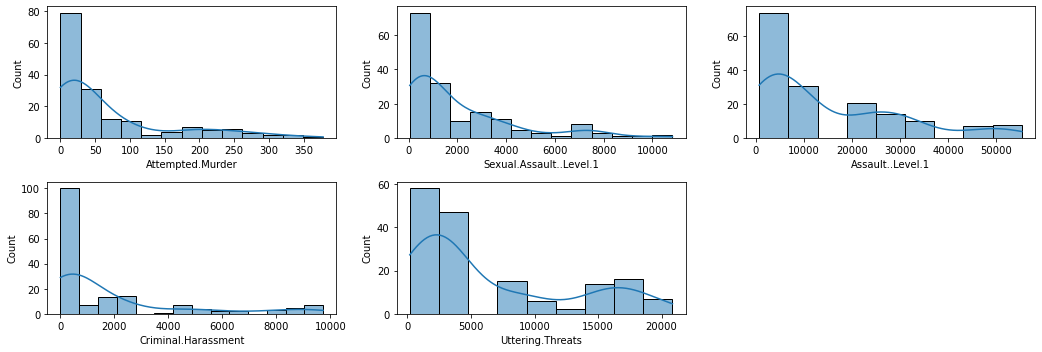

In [9]:

import seaborn as sns
# Define the number of rows and columns you want
n_rows=2
n_cols=3
 
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 5)
for i, column in enumerate(features):
    sns.histplot(subset_provinces[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()
# Removing empty subplot
fig.delaxes(axes[1,2])

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(X1['Geography'])
encoded_X = pd.DataFrame(encoded, columns=mlb.classes_, index=X1['Geography'].index)

# Drop old column and merge new encoded columns
X2 = X1.drop('Geography', axis=1)
X = pd.concat([X2, encoded_X], axis=1, sort=False)


In [31]:
print(encoded_X)

         A  B  C  L  M  N  O  Q  S  ...  l  m  n  o  r  s  t  u  v  w
605   1  0  0  0  1  0  1  0  0  0  ...  1  0  1  1  1  0  0  1  0  1
606   1  0  0  0  1  0  1  0  0  0  ...  1  0  1  1  1  0  0  1  0  1
607   1  0  0  0  1  0  1  0  0  0  ...  1  0  1  1  1  0  0  1  0  1
608   1  0  0  0  1  0  1  0  0  0  ...  1  0  1  1  1  0  0  1  0  1
609   1  0  0  0  1  0  1  0  0  0  ...  1  0  1  1  1  0  0  1  0  1
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
2000  0  0  0  0  0  0  0  0  0  1  ...  0  0  1  0  0  1  1  0  0  1
2005  0  1  0  0  0  0  0  0  0  0  ...  1  0  0  0  1  0  1  0  0  0
2010  1  0  1  1  0  0  0  0  0  0  ...  1  1  0  1  1  1  1  1  0  0
2015  0  0  0  0  0  0  0  0  0  0  ...  0  0  1  1  0  0  0  1  0  0
2020  1  0  0  0  0  0  1  0  0  0  ...  0  0  0  1  1  1  1  0  0  1

[165 rows x 31 columns]


In [13]:
# split for training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# numeric_features = X.iloc[:,:-2].columns

# category_features = X.iloc[:,-1:].columns

# X_train = pd.get_dummies(X,columns=['Geography'])
# # y_train = pd.get_dummies(y,columns=['Geography'])
# print(X_train)
# # pd.get_dummies(X,columns=['Geography']).head()
# # print(X.head())

In [13]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())])


# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown ='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num',numeric_transformer,numeric_features),
#         ('cat', categorical_transformer, category_features)
#     ])
    

In [14]:
# define random forest regressor model
from sklearn.ensemble import RandomForestRegressor

number_of_trees = 100 # set the number of trees in the forest
model = RandomForestRegressor(n_estimators = number_of_trees, random_state = 42)

In [15]:
# complete_model = Pipeline(steps=[('preprocessor',preprocessor),
#                           ('regressor', model)])                               

In [15]:
model.fit(X_train,y_train)


#complete_model.fit(X_train,y_train)
# print(y_train)


RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# predict test data

y_pred = model.predict(X_test)

#calculate the ean squared error
pred_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# calculate R^2                 
pred_r2 = r2_score(y_test, y_pred)

# print performance metrics                 
print("Root mean square is:", pred_rmse)
print("\nR2 score is:", pred_r2)

# X_test = pd.get_dummies(X,columns=['Geography'])
# y_test = pd.get_dummies(X,columns=['Geography'])

Root mean square is: 13.880044974165195

R2 score is: 0.925258848013999


In [18]:
# calculate error percent
print(pred_rmse/np.mean(y_train))

0.24206182277577032


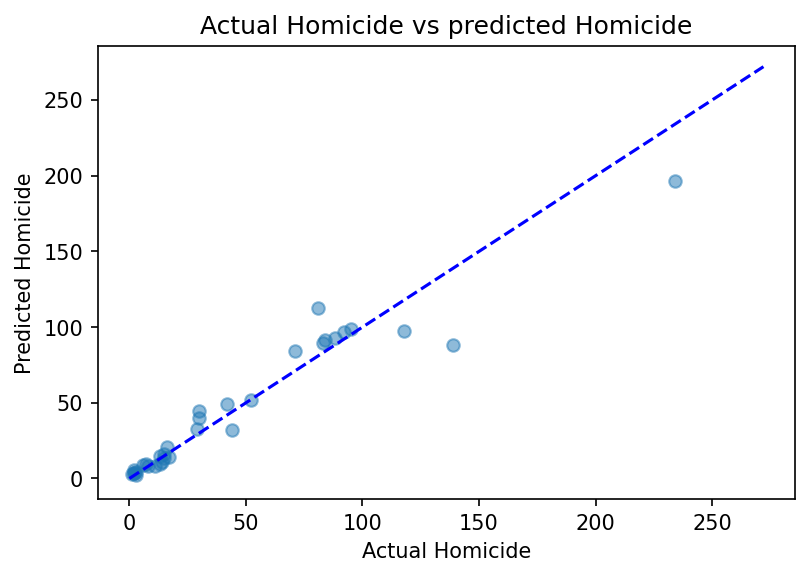

In [29]:
# show how the model fits the test data

plt.figure(dpi=150)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color = 'blue')
plt.title("Actual Homicide vs predicted Homicide")
plt.xlabel('Actual Homicide')
plt.ylabel('Predicted Homicide')
plt.show()

In [20]:
print(X_test.shape)

(33, 36)


In [21]:
print(y_pred.shape)

(33,)


In [22]:
print(y_train.shape)

(132,)


In [23]:
print(np.array(y_test))

[ 83  42   2  30   3  92 234  52  11  15   8   1  17  95   6  88   2  44
   2  13 118   7  15  16  84  14   3  30  13 139  81  71  29]


In [24]:
print(y_pred)

[ 89.4   49.4    3.63  44.67   4.03  96.52 196.68  51.94   8.08  13.74
   7.98   2.8   14.46  98.65   8.98  92.94   3.49  31.94   5.28  14.83
  97.15   9.83  16.13  20.87  91.33  10.73   2.42  39.83   9.39  88.3
 112.68  84.19  32.37]


In [25]:
print(X)

      Attempted.Murder  Sexual.Assault..Level.1  Assault..Level.1  \
605                  5                      336              3097   
606                  1                      401              3455   
607                  2                      416              3415   
608                  0                      353              3520   
609                  2                      367              3406   
...                ...                      ...               ...   
2000                46                     1296             11108   
2005                56                     3420             23034   
2010               102                     3771             27352   
2015                 3                      116              1028   
2020                 1                      244              2800   

      Criminal.Harassment  Uttering.Threats     A  B  C  L  ...  l  m  n  o  \
605                   155              1585  1  0  0  0  1  ...  1  0  1  1   
606          

In [32]:
print(y)

605       7
606       3
607       5
608       1
609       4
       ... 
2000     60
2005    139
2010     98
2015      0
2020      6
Name: Homicide, Length: 165, dtype: int64
